## default parameter XGBoost model


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [17]:
# === Helper function ===
def run_baseline(train_path, label='SalePrice', name=''):
    print(f"\n=== Running {name} ===")

    # 讀取資料
    df = pd.read_csv(train_path)
    X = df.drop(columns=[label])
    y = df[label]

    # 9:1 切分
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.1, random_state=42
    )

    # 建立模型（預設參數）
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)

    # === 訓練集預測 ===
    preds_train = model.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
    mae_train = mean_absolute_error(y_train, preds_train)
    mape_train = np.mean(np.abs((y_train - preds_train) / y_train)) * 100

    # === 驗證集預測 ===
    preds_valid = model.predict(X_valid)
    rmse_valid = np.sqrt(mean_squared_error(y_valid, preds_valid))
    mae_valid = mean_absolute_error(y_valid, preds_valid)
    mape_valid = np.mean(np.abs((y_valid - preds_valid) / y_valid)) * 100

    # === 印出結果 ===
    print(f"[{name}] Performance Summary:")
    print(f"  ▸ Train RMSE = {rmse_train:.4f} | MAE = {mae_train:.4f} | MAPE = {mape_train:.2f}%")
    print(f"  ▸ Valid RMSE = {rmse_valid:.4f} | MAE = {mae_valid:.4f} | MAPE = {mape_valid:.2f}%")

    # === 可視化 ===
    def plot_actual_vs_pred(y_true, y_pred, title):
        sample_idx = np.random.choice(len(y_true), size=min(100, len(y_true)), replace=False)
        plt.figure(figsize=(6, 6))
        plt.scatter(y_true.iloc[sample_idx], y_pred[sample_idx], alpha=0.7, edgecolor='k')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        plt.title(title)
        plt.xlabel("Actual SalePrice")
        plt.ylabel("Predicted SalePrice")
        plt.show()

    plot_actual_vs_pred(
        y_train, preds_train,
        f"{name} — Train Set\nRMSE={rmse_train:.4f} | MAE={mae_train:.4f} | MAPE={mape_train:.2f}%"
    )

    plot_actual_vs_pred(
        y_valid, preds_valid,
        f"{name} — Validation Set (10%)\nRMSE={rmse_valid:.4f} | MAE={mae_valid:.4f} | MAPE={mape_valid:.2f}%"
    )

    return model, rmse_train, mae_train, mape_train, rmse_valid, mae_valid, mape_valid


=== Running Cleaned_all_features ===
[Cleaned_all_features] Performance Summary:
  ▸ Train RMSE = 1060.0737 | MAE = 733.4173 | MAPE = 0.48%
  ▸ Valid RMSE = 28014.2447 | MAE = 17843.5055 | MAPE = 9.75%


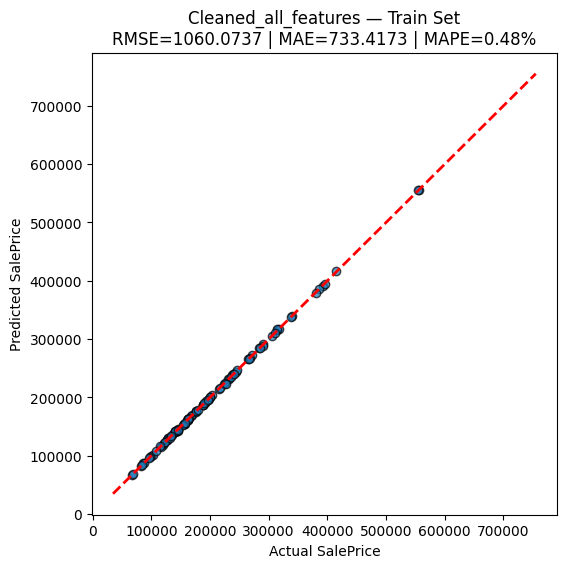

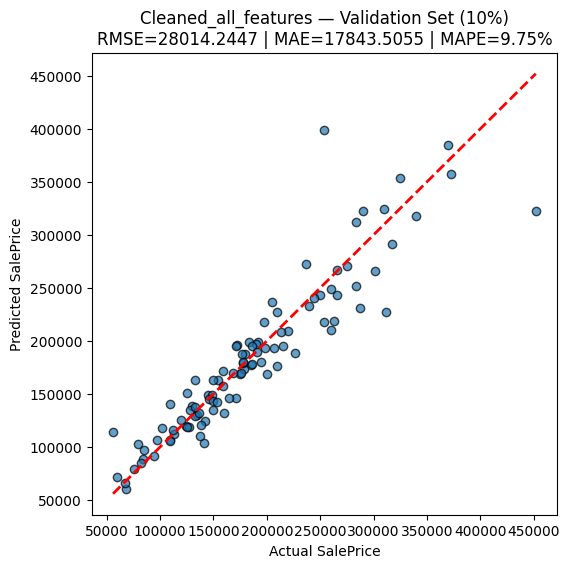

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 1060.0737416650948,
 733.417305312262,
 0.47899160215989023,
 28014.244728073805,
 17843.505511558218,
 9.74540855905398)

In [18]:
# Cleaned version
run_baseline("./data/cleaned/train.csv", name="Cleaned_all_features")


=== Running Method1_Mutual_Info ===
[Method1_Mutual_Info] Performance Summary:
  ▸ Train RMSE = 983.5301 | MAE = 667.3604 | MAPE = 0.44%
  ▸ Valid RMSE = 25946.3152 | MAE = 16567.3409 | MAPE = 9.35%


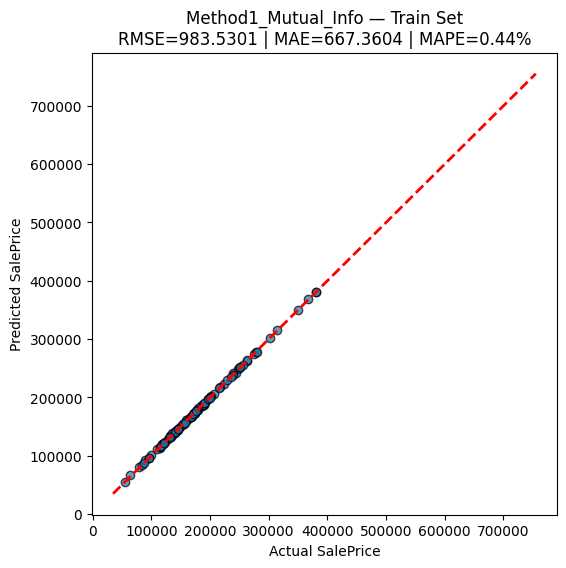

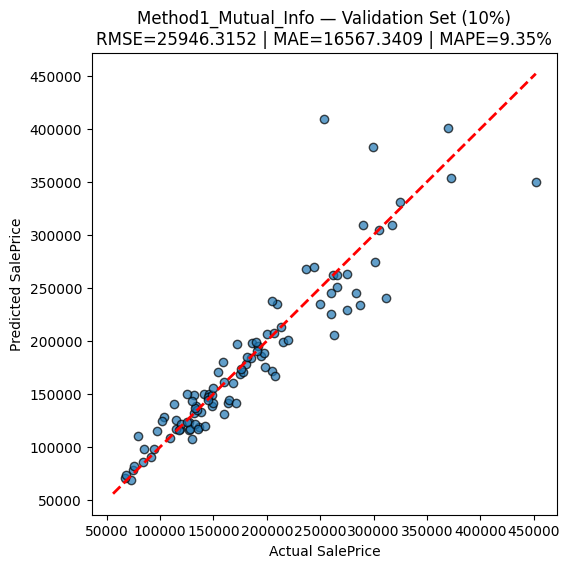

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 983.5301035092443,
 667.3603775942498,
 0.43541965502841806,
 25946.315177274675,
 16567.340860445205,
 9.351590003549488)

In [20]:
# Method 1 (Mutual Information)
run_baseline("./data/Method1,selected/train_filter.csv", name="Method1_Mutual_Info")


=== Running Method2_XGBoost_CV ===
[Method2_XGBoost_CV] Performance Summary:
  ▸ Train RMSE = 1612.4429 | MAE = 1108.1668 | MAPE = 0.75%
  ▸ Valid RMSE = 24594.6613 | MAE = 16772.1933 | MAPE = 10.21%


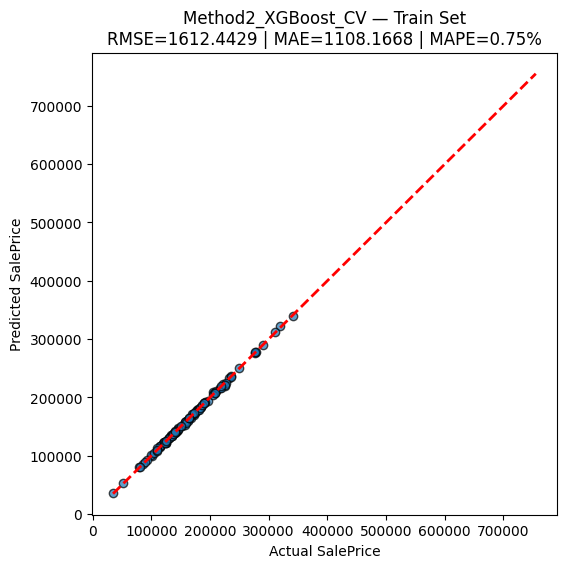

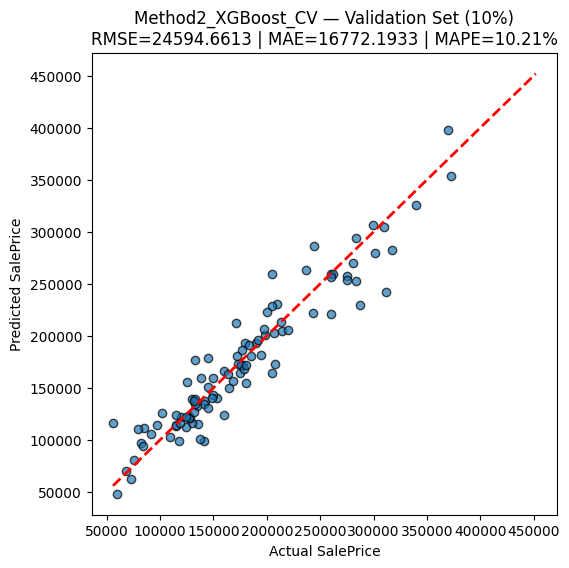

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 1612.4429293274945,
 1108.16681145278,
 0.7494123269982008,
 24594.66130065262,
 16772.193252354453,
 10.206238630696957)

In [21]:
# Method 2 (XGBoost CV)
run_baseline("./data/Method2,selected/train_Method2_selected.csv", name="Method2_XGBoost_CV")

## optimization parameter

### GridSearch

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def plot_actual_vs_pred(y_true, y_pred, title):
    n = min(100, len(y_true))
    idx = np.random.choice(len(y_true), size=n, replace=False)
    plt.figure(figsize=(6,6))
    plt.scatter(y_true.iloc[idx], y_pred[idx], alpha=0.7, edgecolor='k')
    lo, hi = y_true.min(), y_true.max()
    plt.plot([lo, hi], [lo, hi], 'r--', lw=2)
    plt.title(title)
    plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
    plt.show()

def run_grid_search(train_path, label='SalePrice', name=''):
    print(f"\n=== GridSearch on {name} ===")
    df = pd.read_csv(train_path)
    X = df.drop(columns=[label])
    y = df[label]

    # 9:1 hold-out split（仅用于最终评估；GridSearch 内部再做 3-fold CV）
    X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.1, random_state=42)

    # 基础模型
    base = XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )

    # 参数网格（小而有效，偏向抑制过拟合）
    param_grid = {
        'max_depth': [3, 4, 5],
        'learning_rate': [0.05, 0.1],
        'n_estimators': [300, 600, 900],
        'subsample': [0.7, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0],
        'reg_lambda': [0.0, 1.0, 5.0],
        'reg_alpha': [0.0, 0.1, 0.5],
    }

    gs = GridSearchCV(
        estimator=base,
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',  # 越大越好
        cv=3,
        n_jobs=-1,
        verbose=1,
        refit=True  # 用最佳参数在 (X_tr, y_tr) 重新拟合
    )

    gs.fit(X_tr, y_tr)

    print("Best params:", gs.best_params_)
    print("Best CV RMSE:", -gs.best_score_)

    best_model = gs.best_estimator_

    # 训练集与验证集评估（基于 hold-out）
    pred_tr = best_model.predict(X_tr)
    pred_va = best_model.predict(X_va)

    rmse_tr, mae_tr, mape_tr = metrics(y_tr, pred_tr)
    rmse_va, mae_va, mape_va = metrics(y_va, pred_va)

    print(f"[{name}] Hold-out Performance")
    print(f"  ▸ Train  RMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%")
    print(f"  ▸ Valid  RMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%")

    # 可视化
    plot_actual_vs_pred(
        y_tr, pred_tr,
        f"{name} — Train (best params)\nRMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%"
    )
    plot_actual_vs_pred(
        y_va, pred_va,
        f"{name} — Valid 10% (best params)\nRMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%"
    )

    return best_model, gs.best_params_, {
        "train": (rmse_tr, mae_tr, mape_tr),
        "valid": (rmse_va, mae_va, mape_va)
    }


=== GridSearch on Cleaned_all_features ===
Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
Best params: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'reg_alpha': 0.5, 'reg_lambda': 0.0, 'subsample': 0.9}
Best CV RMSE: 30792.157254833714
[Cleaned_all_features] Hold-out Performance
  ▸ Train  RMSE=4523.6375 | MAE=3540.4072 | MAPE=2.28%
  ▸ Valid  RMSE=22602.9667 | MAE=15175.0697 | MAPE=8.57%


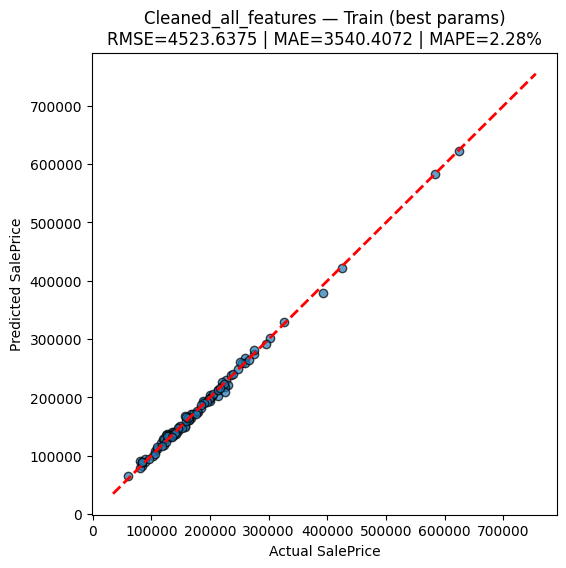

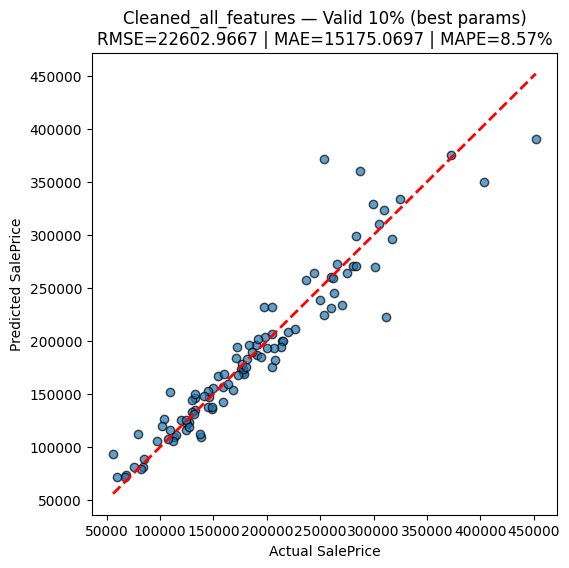

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'colsample_bytree': 0.9,
  'learning_rate': 0.1,
  'max_depth': 4,
  'n_estimators': 300,
  'reg_alpha': 0.5,
  'reg_lambda': 0.0,
  'subsample': 0.9},
 {'train': (4523.637479589395, 3540.40721094345, 2.2824034027137774),
  'valid': (22602.966727055

In [30]:
run_grid_search("./data/cleaned/train.csv", name="Cleaned_all_features")


=== GridSearch on Method1_Mutual_Info ===
Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
Best params: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 900, 'reg_alpha': 0.1, 'reg_lambda': 0.0, 'subsample': 0.9}
Best CV RMSE: 31874.219378643542
[Method1_Mutual_Info] Hold-out Performance
  ▸ Train  RMSE=2839.6250 | MAE=2249.2591 | MAPE=1.47%
  ▸ Valid  RMSE=23103.6802 | MAE=15296.0199 | MAPE=8.51%


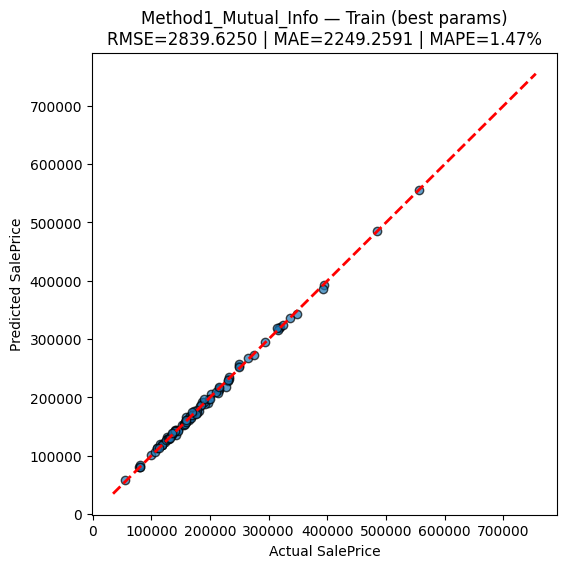

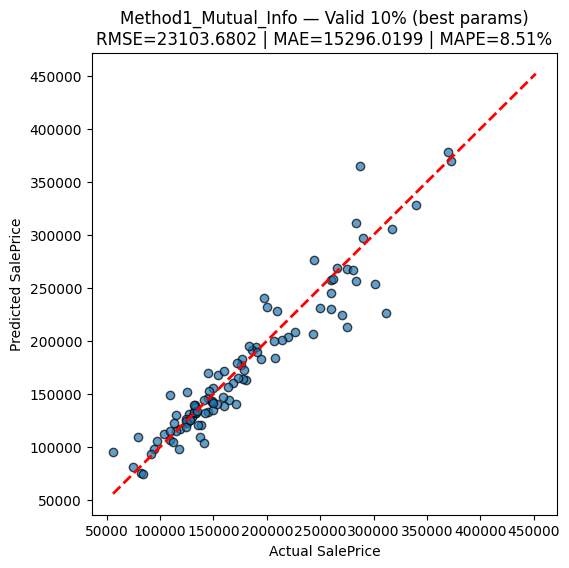

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=900, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'colsample_bytree': 0.9,
  'learning_rate': 0.05,
  'max_depth': 4,
  'n_estimators': 900,
  'reg_alpha': 0.1,
  'reg_lambda': 0.0,
  'subsample': 0.9},
 {'train': (2839.6250030260626, 2249.259109624905, 1.4676113371931727),
  'valid': (23103.68023

In [ ]:
run_grid_search("./data/Method1,selected/train_filter.csv", name="Method1_Mutual_Info")


=== GridSearch on Method2_XGBoost_CV ===
Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0.5, 'reg_lambda': 5.0, 'subsample': 1.0}
Best CV RMSE: 31182.683765871643
[Method2_XGBoost_CV] Hold-out Performance
  ▸ Train  RMSE=9788.8902 | MAE=6907.2373 | MAPE=4.56%
  ▸ Valid  RMSE=23292.0875 | MAE=16091.6317 | MAPE=9.60%


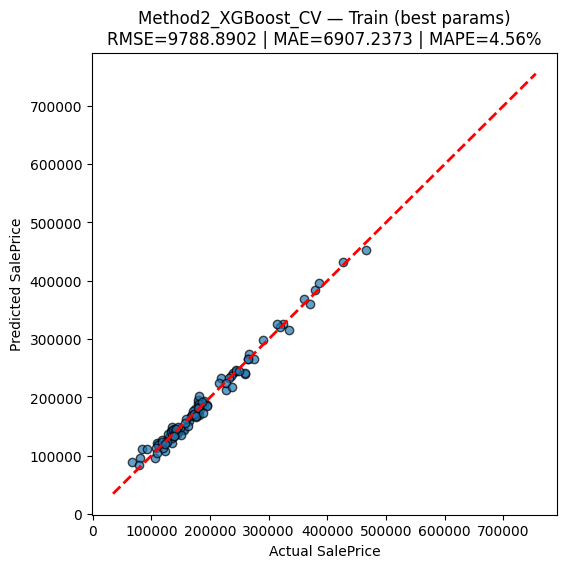

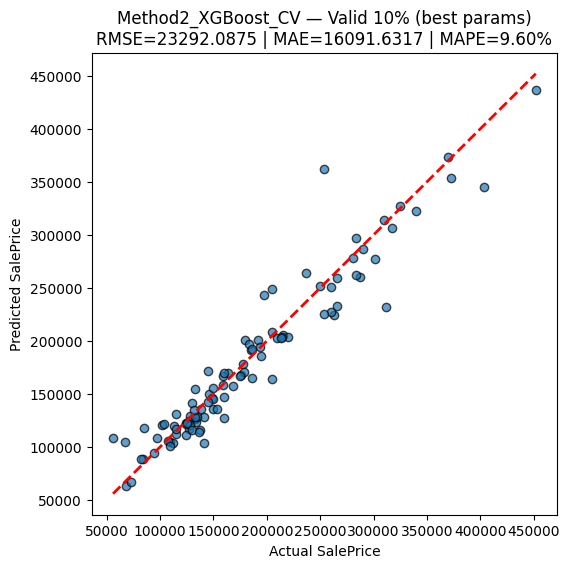

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'colsample_bytree': 0.7,
  'learning_rate': 0.05,
  'max_depth': 5,
  'n_estimators': 300,
  'reg_alpha': 0.5,
  'reg_lambda': 5.0,
  'subsample': 1.0},
 {'train': (9788.890208172685, 6907.2372608054075, 4.557166689843721),
  'valid': (23292.087469

In [ ]:
run_grid_search("./data/Method2,selected/train_Method2_selected.csv", name="Method2_XGBoost_CV")

### more specific GridSearch

In [31]:
def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = np.mean(np.abs(y_true - y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def plot_actual_vs_pred(y_true, y_pred, title):
    idx = np.random.choice(len(y_true), size=min(100, len(y_true)), replace=False)
    plt.figure(figsize=(6,6))
    plt.scatter(y_true.iloc[idx], y_pred[idx], alpha=0.7, edgecolor='k')
    lo, hi = y_true.min(), y_true.max()
    plt.plot([lo, hi], [lo, hi], 'r--', lw=2)
    plt.title(title)
    plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
    plt.show()

def run_two_stage_grid(train_path, label='SalePrice', name=''):
    print(f"\n=== Two-Stage GridSearch on {name} ===")
    df = pd.read_csv(train_path)
    X = df.drop(columns=[label])
    y = df[label]

    # 固定 9:1 hold-out（最終評估用；GridSearch 內用 3-Fold CV）
    X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.1, random_state=42)

    base = XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )

    # -------- Stage A：寬網格（粗篩） --------
    param_grid_A = {
        'max_depth':        [3, 5, 7],
        'min_child_weight': [1, 4],
        'gamma':            [0.0, 0.2],
        'learning_rate':    [0.03, 0.07, 0.1],
        'n_estimators':     [300, 600, 900],
        'subsample':        [0.7, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0],
        'reg_lambda':       [0.0, 3.0, 6.0],
        'reg_alpha':        [0.0, 0.5, 1.0],
    }
    gsA = GridSearchCV(
        estimator=base,
        param_grid=param_grid_A,
        scoring='neg_root_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    gsA.fit(X_tr, y_tr)
    bestA = gsA.best_params_
    print("[Stage A] Best params:", bestA)
    print("[Stage A] Best CV RMSE:", -gsA.best_score_)

    # -------- Stage B：精修網格（圍繞 Stage A 最佳點）--------
    # 小工具：圍繞一個數字生成鄰域（去重 + 夾緊邏輯）
    def around(v, choices):
        s = sorted(set(choices))
        return s

    lr = bestA['learning_rate']
    md = bestA['max_depth']
    ne = bestA['n_estimators']
    ss = bestA['subsample']
    cs = bestA['colsample_bytree']
    rl = bestA['reg_lambda']
    ra = bestA['reg_alpha']
    mc = bestA['min_child_weight']
    gm = bestA['gamma']

    param_grid_B = {
        'max_depth':        sorted(set([max(2, md-1), md, md+1])),
        'min_child_weight': sorted(set([max(1, mc-1), mc, mc+2])),
        'gamma':            sorted(set([max(0.0, gm-0.1), gm, gm+0.1])),
        'learning_rate':    sorted(set([max(0.01, lr/2), lr, min(0.2, lr*1.5)])),
        'n_estimators':     sorted(set([max(100, ne-200), ne, ne+300])),
        'subsample':        sorted(set([max(0.5, ss-0.1), ss, min(1.0, ss+0.1)])),
        'colsample_bytree': sorted(set([max(0.5, cs-0.1), cs, min(1.0, cs+0.1)])),
        'reg_lambda':       sorted(set([max(0.0, rl-2.0), rl, rl+2.0])),
        'reg_alpha':        sorted(set([max(0.0, ra-0.2), ra, ra+0.2])),
    }

    gsB = GridSearchCV(
        estimator=base,
        param_grid=param_grid_B,
        scoring='neg_root_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    gsB.fit(X_tr, y_tr)
    bestB = gsB.best_params_
    print("[Stage B] Best params:", bestB)
    print("[Stage B] Best CV RMSE:", -gsB.best_score_)

    best_model = gsB.best_estimator_

    # ---- 最終 hold-out 評估 ----
    pred_tr = best_model.predict(X_tr)
    pred_va = best_model.predict(X_va)

    rmse_tr, mae_tr, mape_tr = metrics(y_tr, pred_tr)
    rmse_va, mae_va, mape_va = metrics(y_va, pred_va)

    print(f"[{name}] Hold-out Performance (Stage B best)")
    print(f"  ▸ Train  RMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%")
    print(f"  ▸ Valid  RMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%")

    plot_actual_vs_pred(
        y_tr, pred_tr,
        f"{name} — Train (Stage B best)\nRMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%"
    )
    plot_actual_vs_pred(
        y_va, pred_va,
        f"{name} — Valid 10% (Stage B best)\nRMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%"
    )

    return best_model, {'StageA': bestA, 'StageB': bestB}, {
        'train': (rmse_tr, mae_tr, mape_tr),
        'valid': (rmse_va, mae_va, mape_va)
    }



=== Two-Stage GridSearch on Cleaned_all_features ===
Fitting 3 folds for each of 5832 candidates, totalling 17496 fits
[Stage A] Best params: {'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 900, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0}
[Stage A] Best CV RMSE: 30959.815079776774
Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
[Stage B] Best params: {'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 1200, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 0.9}
[Stage B] Best CV RMSE: 30895.92403887356
[Cleaned_all_features] Hold-out Performance (Stage B best)
  ▸ Train  RMSE=7769.5612 | MAE=5772.9679 | MAPE=3.68%
  ▸ Valid  RMSE=21520.8064 | MAE=14305.1580 | MAPE=8.02%


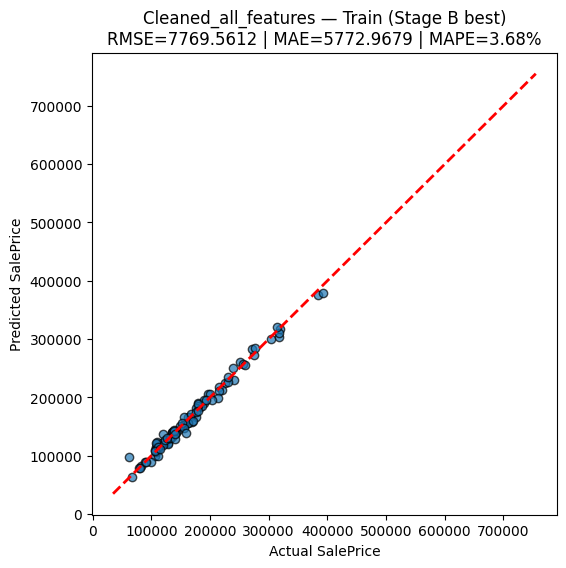

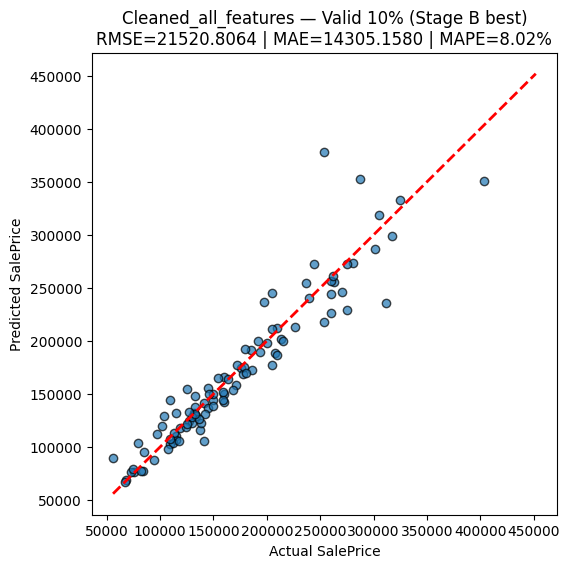

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1200, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'StageA': {'colsample_bytree': 1.0,
   'gamma': 0.0,
   'learning_rate': 0.03,
   'max_depth': 3,
   'min_child_weight': 4,
   'n_estimators': 900,
   'reg_alpha': 0.0,
   'reg_lambda': 0.0,
   'subsample': 1.0},
  'StageB': {'colsample_bytree': 1.0,


In [32]:
run_two_stage_grid("./data/cleaned/train.csv",name="Cleaned_all_features")



=== Two-Stage GridSearch on Method1_Mutual_Info ===
Fitting 3 folds for each of 5832 candidates, totalling 17496 fits
[Stage A] Best params: {'colsample_bytree': 0.9, 'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 900, 'reg_alpha': 0.5, 'reg_lambda': 0.0, 'subsample': 1.0}
[Stage A] Best CV RMSE: 31886.94538531076
Fitting 3 folds for each of 3888 candidates, totalling 11664 fits
[Stage B] Best params: {'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.045, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 700, 'reg_alpha': 0.7, 'reg_lambda': 0.0, 'subsample': 1.0}
[Stage B] Best CV RMSE: 31473.43042981262
[Method1_Mutual_Info] Hold-out Performance (Stage B best)
  ▸ Train  RMSE=2465.3527 | MAE=1801.9733 | MAPE=1.18%
  ▸ Valid  RMSE=22704.4490 | MAE=15313.3716 | MAPE=8.74%


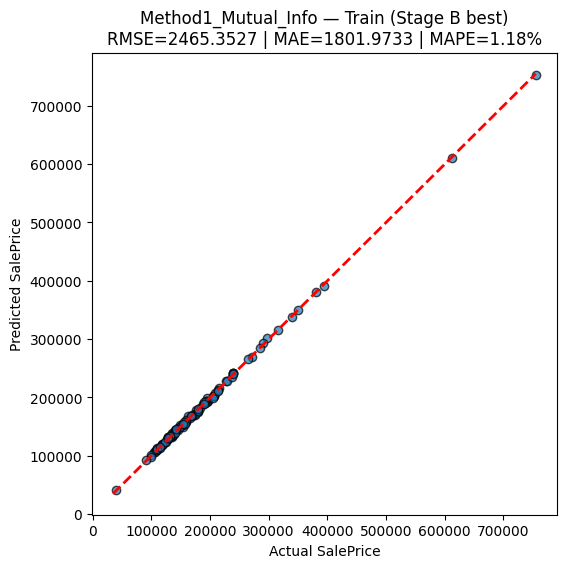

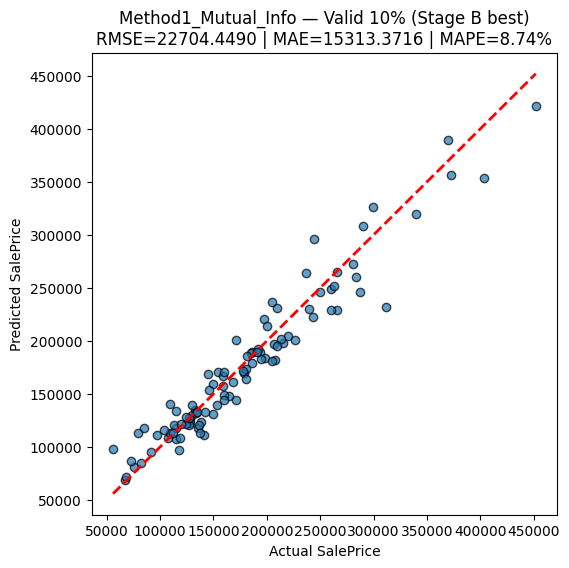

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.045, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'StageA': {'colsample_bytree': 0.9,
   'gamma': 0.0,
   'learning_rate': 0.03,
   'max_depth': 5,
   'min_child_weight': 1,
   'n_estimators': 900,
   'reg_alpha': 0.5,
   'reg_lambda': 0.0,
   'subsample': 1.0},
  'StageB': {'colsample_bytree': 1.0,


In [34]:
run_two_stage_grid("./data/Method1,selected//train_filter.csv",name="Method1_Mutual_Info")



=== Two-Stage GridSearch on Method2_XGBoost_CV ===
Fitting 3 folds for each of 5832 candidates, totalling 17496 fits
[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.0, 'reg_lambda': 6.0, 'subsample': 1.0}
[Stage A] Best CV RMSE: 30814.989377615708
Fitting 3 folds for each of 3888 candidates, totalling 11664 fits
[Stage B] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.035, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.2, 'reg_lambda': 8.0, 'subsample': 0.9}
[Stage B] Best CV RMSE: 30712.2043457166
[Method2_XGBoost_CV] Hold-out Performance (Stage B best)
  ▸ Train  RMSE=14681.9699 | MAE=10344.8446 | MAPE=6.58%
  ▸ Valid  RMSE=22769.6862 | MAE=15539.3249 | MAPE=9.27%


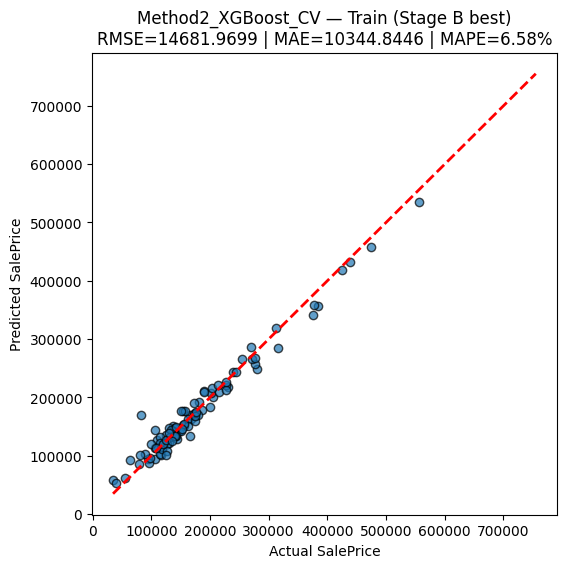

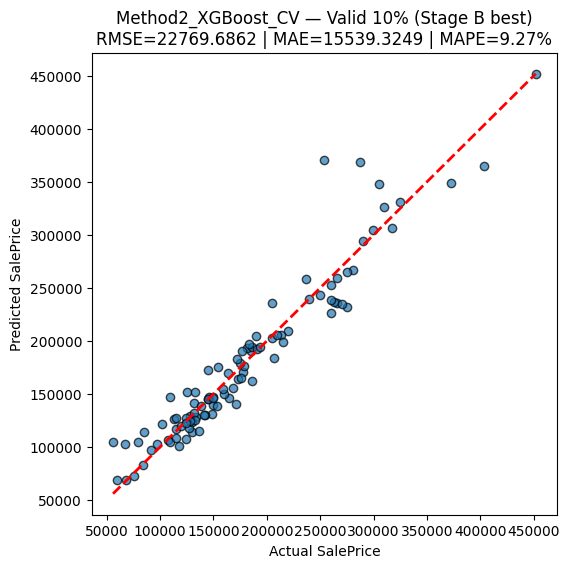

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.035, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 {'StageA': {'colsample_bytree': 0.7,
   'gamma': 0.0,
   'learning_rate': 0.07,
   'max_depth': 5,
   'min_child_weight': 1,
   'n_estimators': 300,
   'reg_alpha': 0.0,
   'reg_lambda': 6.0,
   'subsample': 1.0},
  'StageB': {'colsample_bytree': 0.7,


In [35]:
run_two_stage_grid("./data/Method2,selected/train_Method2_selected.csv",name="Method2_XGBoost_CV")


###  log + GridSearch

In [37]:
def eval_with_log_target(train_path, best_params, label='SalePrice', rs=42):
    df = pd.read_csv(train_path)
    X = df.drop(columns=[label])
    y = df[label].astype(float)

    # 9:1 切分
    X_tr, X_va, y_tr_raw, y_va_raw = train_test_split(X, y, test_size=0.1, random_state=rs)

    # log1p 目标
    y_tr = np.log1p(y_tr_raw)
    y_va = np.log1p(y_va_raw)

    # 用你现成的最佳参数（来自之前线性目标版本）
    model = XGBRegressor(objective='reg:squarederror', random_state=rs, n_jobs=-1, **best_params)
    model.fit(X_tr, y_tr)

    # 反变换到原始金额再评估
    pred_tr = np.expm1(model.predict(X_tr))
    pred_va = np.expm1(model.predict(X_va))

    rmse_tr = np.sqrt(mean_squared_error(y_tr_raw, pred_tr))
    mae_tr  = mean_absolute_error(y_tr_raw, pred_tr)
    mape_tr = np.mean(np.abs((y_tr_raw - pred_tr)/y_tr_raw))*100

    rmse_va = np.sqrt(mean_squared_error(y_va_raw, pred_va))
    mae_va  = mean_absolute_error(y_va_raw, pred_va)
    mape_va = np.mean(np.abs((y_va_raw - pred_va)/y_va_raw))*100

    print("[LOG target] Hold-out (use previous best params)")
    print(f"  ▸ Train RMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%")
    print(f"  ▸ Valid RMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%")
    return model, (rmse_tr, mae_tr, mape_tr), (rmse_va, mae_va, mape_va)

In [39]:
# cleaned version
best_params_from_linear = {
    'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 1200, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 0.9
}
eval_with_log_target("./data/cleaned/train.csv", best_params_from_linear)


[LOG target] Hold-out (use previous best params)
  ▸ Train RMSE=8239.3605 | MAE=5786.8019 | MAPE=3.32%
  ▸ Valid RMSE=19963.0976 | MAE=13549.1254 | MAPE=7.69%


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1200, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 (8239.360480570052, 5786.801890946306, 3.324279854785153),
 (19963.09755152172, 13549.125428082192, 7.689991019113443))

In [41]:
# methond 1
best_params_from_linear = {
    'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.045, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 700, 'reg_alpha': 0.7, 'reg_lambda': 0.0, 'subsample': 1.0
}
eval_with_log_target("./data/Method1,selected/train_filter.csv", best_params_from_linear)

[LOG target] Hold-out (use previous best params)
  ▸ Train RMSE=11621.8780 | MAE=7115.4679 | MAPE=3.95%
  ▸ Valid RMSE=23970.9833 | MAE=15483.4311 | MAPE=8.58%


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.045, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 (11621.87796653404, 7115.467908058835, 3.953891335846231),
 (23970.98330627841, 15483.43110552226, 8.577224852515302))

In [44]:
# method 2
best_params_from_linear = {
    'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.035, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.2, 'reg_lambda': 8.0, 'subsample': 0.9
}
eval_with_log_target("./data/Method2,selected/train_Method2_selected.csv", best_params_from_linear)

[LOG target] Hold-out (use previous best params)
  ▸ Train RMSE=16940.5018 | MAE=10871.2347 | MAPE=6.25%
  ▸ Valid RMSE=22537.7309 | MAE=15930.0779 | MAPE=9.55%


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.035, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 (16940.50177881223, 10871.234678455827, 6.253761294842436),
 (22537.73088856423, 15930.077910958904, 9.552563037625987))

In [47]:
# --------- 工具函数 ---------
def _metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

def _plot_actual_vs_pred(y_true, y_pred, title):
    n = min(100, len(y_true))
    idx = np.random.choice(len(y_true), size=n, replace=False)
    plt.figure(figsize=(6,6))
    plt.scatter(y_true.iloc[idx], y_pred[idx], alpha=0.7, edgecolor='k')
    lo, hi = y_true.min(), y_true.max()
    plt.plot([lo, hi], [lo, hi], 'r--', lw=2)
    plt.title(title)
    plt.xlabel("Actual SalePrice"); plt.ylabel("Predicted SalePrice")
    plt.show()

# --------- 两阶段网格（LOG 目标，从零开始） ---------
def run_two_stage_grid_LOG(train_path, label='SalePrice', name='', random_state=42):
    print(f"\n=== Two-Stage GridSearch (LOG target) on {name} ===")

    # 读取与切分
    df = pd.read_csv(train_path)
    X  = df.drop(columns=[label])
    y0 = df[label].astype(float)

    # 目标做 log1p（训练/交叉验证用）；评估时再 expm1 回原尺度
    y = np.log1p(y0)

    # 9:1 hold-out（仅用于最终报告）；GridSearch 内部再做 3-fold
    X_tr, X_va, y0_tr, y0_va = train_test_split(X, y0, test_size=0.1, random_state=random_state)
    _,   _,   y_tr,  y_va  = train_test_split(X, y,  test_size=0.1, random_state=random_state)

    base = XGBRegressor(
        objective='reg:squarederror',
        random_state=random_state,
        n_jobs=-1
    )

    # ---------- Stage A：宽网格（粗筛） ----------
    param_grid_A = {
        'max_depth':        [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'gamma':            [0.0, 0.1, 0.2],
        'learning_rate':    [0.02, 0.05, 0.1],
        'n_estimators':     [400, 800, 1200],
        'subsample':        [0.7, 0.85, 1.0],
        'colsample_bytree': [0.7, 0.85, 1.0],
        'reg_lambda':       [0.0, 2.0, 6.0],
        'reg_alpha':        [0.0, 0.2, 0.6],
    }
    gsA = GridSearchCV(
        estimator=base,
        param_grid=param_grid_A,
        scoring='neg_root_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    gsA.fit(X_tr, y_tr)
    bestA = gsA.best_params_
    print("[Stage A] Best params:", bestA)
    print("[Stage A] Best CV RMSE:", -gsA.best_score_)

    # ---------- Stage B：围绕最佳点精修 ----------
    md, mc, gm = bestA['max_depth'], bestA['min_child_weight'], bestA['gamma']
    lr, ne     = bestA['learning_rate'], bestA['n_estimators']
    ss, cs     = bestA['subsample'], bestA['colsample_bytree']
    rl, ra     = bestA['reg_lambda'], bestA['reg_alpha']

    param_grid_B = {
        'max_depth':        sorted(set([max(2, md-1), md, md+1])),
        'min_child_weight': sorted(set([max(1, mc-1), mc, mc+2])),
        'gamma':            sorted(set([max(0.0, gm-0.05), gm, gm+0.05])),
        'learning_rate':    sorted(set([max(0.01, lr/1.5), lr, min(0.2, lr*1.5)])),
        'n_estimators':     sorted(set([max(200, ne-200), ne, ne+300])),
        'subsample':        sorted(set([max(0.5, ss-0.1), ss, min(1.0, ss+0.1)])),
        'colsample_bytree': sorted(set([max(0.5, cs-0.1), cs, min(1.0, cs+0.1)])),
        'reg_lambda':       sorted(set([max(0.0, rl-2.0), rl, rl+2.0])),
        'reg_alpha':        sorted(set([max(0.0, ra-0.2), ra, ra+0.2])),
    }
    gsB = GridSearchCV(
        estimator=base,
        param_grid=param_grid_B,
        scoring='neg_root_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=1,
        refit=True
    )
    gsB.fit(X_tr, y_tr)
    bestB = gsB.best_params_
    print("[Stage B] Best params:", bestB)
    print("[Stage B] Best CV RMSE:", -gsB.best_score_)

    best_model = gsB.best_estimator_

    # ---------- 最终：在原始金额尺度评估 ----------
    pred_tr = np.expm1(best_model.predict(X_tr))
    pred_va = np.expm1(best_model.predict(X_va))

    rmse_tr, mae_tr, mape_tr = _metrics(y0_tr, pred_tr)
    rmse_va, mae_va, mape_va = _metrics(y0_va, pred_va)

    print(f"[{name} · LOG] Hold-out Performance (ORIGINAL SCALE)")
    print(f"  ▸ Train  RMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%")
    print(f"  ▸ Valid  RMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%")

    _plot_actual_vs_pred(
        y0_tr, pred_tr,
        f"{name} — Train [LOG] (Stage B)\nRMSE={rmse_tr:.4f} | MAE={mae_tr:.4f} | MAPE={mape_tr:.2f}%"
    )
    _plot_actual_vs_pred(
        y0_va, pred_va,
        f"{name} — Valid 10% [LOG] (Stage B)\nRMSE={rmse_va:.4f} | MAE={mae_va:.4f} | MAPE={mape_va:.2f}%"
    )

    return {
        "best_params": {"StageA": bestA, "StageB": bestB},
        "cv_best_rmse": {"StageA": -gsA.best_score_, "StageB": -gsB.best_score_},
        "holdout_metrics": {
            "train": (rmse_tr, mae_tr, mape_tr),
            "valid": (rmse_va, mae_va, mape_va),
        },
        "model": best_model
    }


=== Two-Stage GridSearch (LOG target) on Cleaned_all_features ===
Fitting 3 folds for each of 19683 candidates, totalling 59049 fits
[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1200, 'reg_alpha': 0.0, 'reg_lambda': 6.0, 'subsample': 0.7}
[Stage A] Best CV RMSE: 0.1323063747307076
Fitting 3 folds for each of 5832 candidates, totalling 17496 fits
[Stage B] Best params: {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1500, 'reg_alpha': 0.0, 'reg_lambda': 4.0, 'subsample': 0.6}
[Stage B] Best CV RMSE: 0.13125517008723533
[Cleaned_all_features · LOG] Hold-out Performance (ORIGINAL SCALE)
  ▸ Train  RMSE=11412.6035 | MAE=7581.9493 | MAPE=4.32%
  ▸ Valid  RMSE=20811.0002 | MAE=14379.7908 | MAPE=7.95%


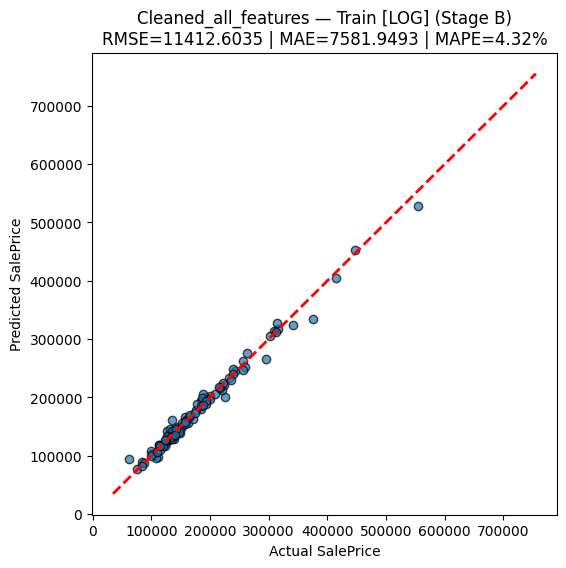

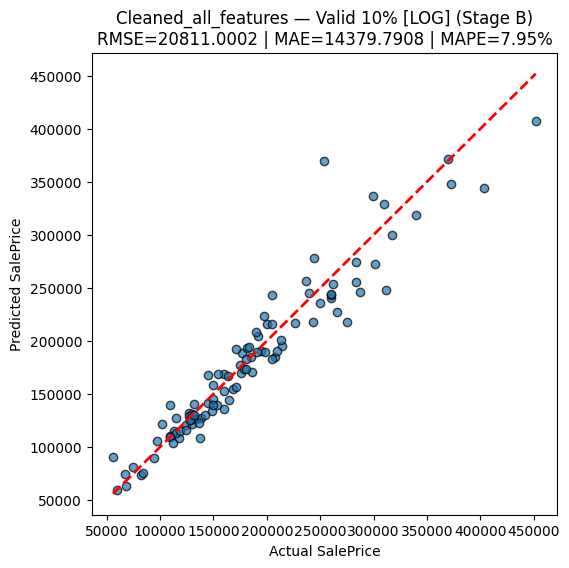

In [48]:
# 1) Cleaned version
res_cleaned_log = run_two_stage_grid_LOG("./data/cleaned/train.csv", name="Cleaned_all_features")



=== Two-Stage GridSearch (LOG target) on Method1_Mutual_Info ===
Fitting 3 folds for each of 19683 candidates, totalling 59049 fits
[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1200, 'reg_alpha': 0.0, 'reg_lambda': 6.0, 'subsample': 0.7}
[Stage A] Best CV RMSE: 0.13530392133524466
Fitting 3 folds for each of 5832 candidates, totalling 17496 fits
[Stage B] Best params: {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000, 'reg_alpha': 0.0, 'reg_lambda': 6.0, 'subsample': 0.7}
[Stage B] Best CV RMSE: 0.13383072250897796
[Method1_Mutual_Info · LOG] Hold-out Performance (ORIGINAL SCALE)
  ▸ Train  RMSE=15088.8504 | MAE=9802.6955 | MAPE=5.56%
  ▸ Valid  RMSE=21653.8048 | MAE=14727.4605 | MAPE=7.98%


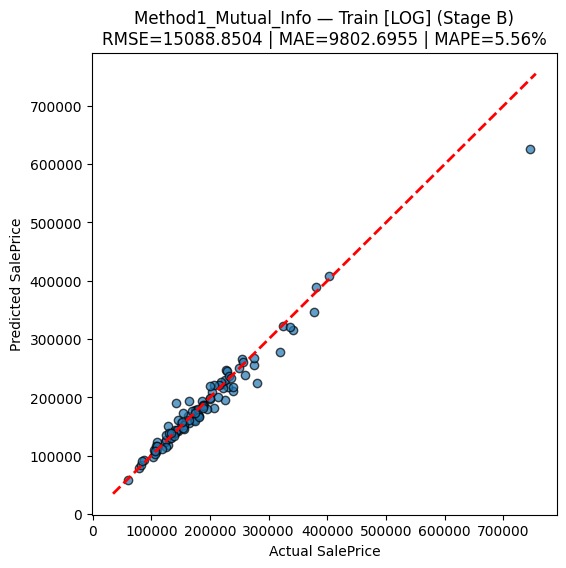

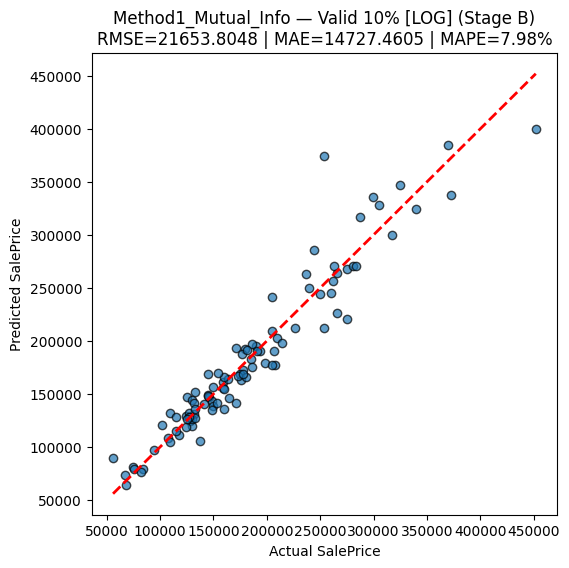

In [49]:
# 2) Method 2
res_m1_log = run_two_stage_grid_LOG("./data/Method1,selected/train_filter.csv", name="Method1_Mutual_Info")



=== Two-Stage GridSearch (LOG target) on Method2_XGBoost_CV ===
Fitting 3 folds for each of 19683 candidates, totalling 59049 fits
[Stage A] Best params: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 400, 'reg_alpha': 0.0, 'reg_lambda': 2.0, 'subsample': 0.85}
[Stage A] Best CV RMSE: 0.13832159091943494
Fitting 3 folds for each of 8748 candidates, totalling 26244 fits
[Stage B] Best params: {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.03333333333333333, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 700, 'reg_alpha': 0.0, 'reg_lambda': 4.0, 'subsample': 0.75}
[Stage B] Best CV RMSE: 0.13748280454184586
[Method2_XGBoost_CV · LOG] Hold-out Performance (ORIGINAL SCALE)
  ▸ Train  RMSE=14333.2896 | MAE=9768.9628 | MAPE=5.75%
  ▸ Valid  RMSE=22214.2515 | MAE=16277.4147 | MAPE=9.43%


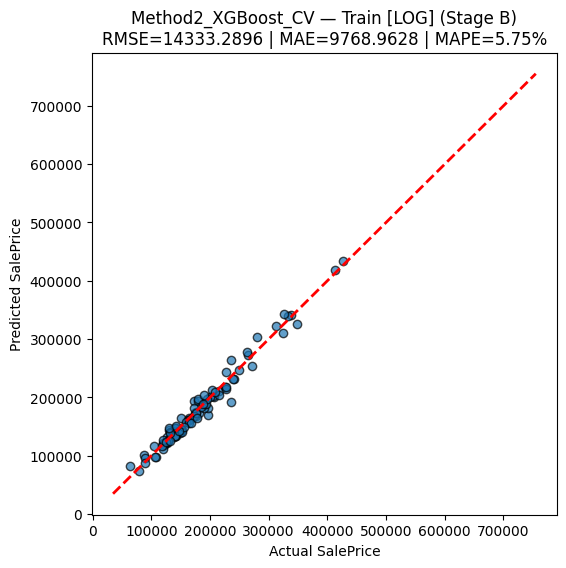

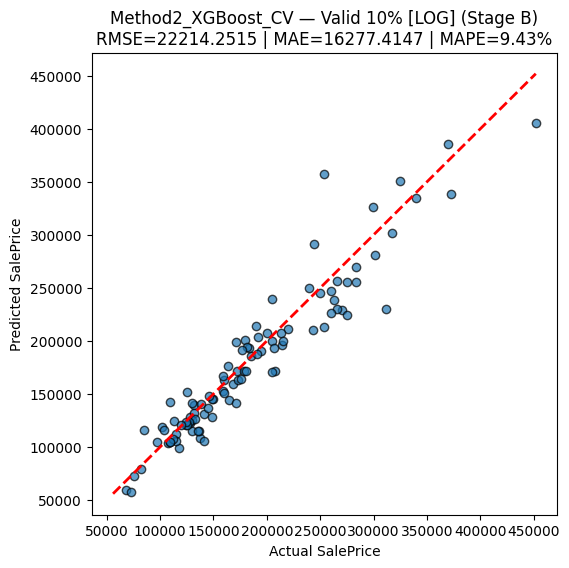

In [50]:
# 3) Method 2（XGB CV 30 特征）
res_m2_log = run_two_stage_grid_LOG("./data/Method2,selected/train_Method2_selected.csv", name="Method2_XGBoost_CV")